# Classification of Recyclable/Non-Recyclable Waste using Image Recognition

## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Set up path

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(dataset_dir, output_dir, test_size=0.2):
    categories = os.listdir(dataset_dir)
    
    for category in categories:
        category_path = os.path.join(dataset_dir, category)
        if not os.path.isdir(category_path):
            continue
        
        images = os.listdir(category_path)
        train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
        
        train_category_path = os.path.join(output_dir, 'train', category)
        test_category_path = os.path.join(output_dir, 'test', category)
        
        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)
        
        for img in train_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(train_category_path, img))
        
        for img in test_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(test_category_path, img))
    
    print("Dataset split completed successfully!")


dataset_dir = "dataset2"  # Path to the dataset
destination_dir = "split_dataset"  # Path to store train/test splits
split_dataset(dataset_dir, destination_dir, test_size=0.2)

Dataset split completed successfully!


In [3]:
base_dir = r'dataset2'
train_dir = r'split_dataset\train'
test_dir = r'split_dataset\test'

## Use ImageDataGenerator to prepare the data for training and testing

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2278 images belonging to 4 classes.


In [6]:
print(train_data.class_indices)

{'hazardous': 0, 'non-recyclable': 1, 'organic': 2, 'recyclable': 3}


In [7]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)

Found 573 images belonging to 4 classes.


In [8]:
print(test_data.class_indices)

{'hazardous': 0, 'non-recyclable': 1, 'organic': 2, 'recyclable': 3}


## Display sample images from each class

d:\Devanshu_College\players_hacktronix\venv\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


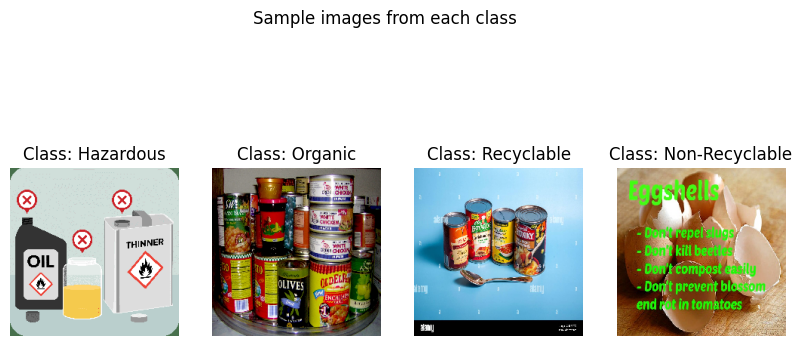

In [9]:
plt.figure(figsize=(10,5))
for i in range(4): # Display 4 images (2 from each calss if available)
    image, label = next(train_data)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])
    plt.title('Class: ' + ('Hazardous' if label[1] == 0 else 'Non-Recyclable' if label[1] == 1 else 'Organic' if label[1] == 2 else 'Recyclable'))
    plt.axis('off')
plt.suptitle('Sample images from each class')
plt.show()

## Load and Configure MobileNet Model

In [10]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model.trainable = False

# Add custom layers for classification
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# We start with a pre-trained MobileNet model, adding layers to classify waste images into O or R

## Train the Model

In [ ]:
history = model.fit(
    train_data,
    validation_data = test_data,
    epochs = 31
)

# After training the model, save it to a file
model.save('models/mobilenet_waste_classifier2.h5')

loss, accuracy = model.evaluate(test_data)
print('Model Accuracy: ', accuracy)

Epoch 1/31
72/72 ━━━━━━━━━━━━━━━━━━━━ 293s 4s/step - accuracy: 0.2125 - loss: -23.3073 - val_accuracy: 0.2216 - val_loss: -27.2296
Epoch 2/31
72/72 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.2354 - loss: -32.1050 - val_accuracy: 0.2216 - val_loss: -35.7366
Epoch 3/31
72/72 ━━━━━━━━━━━━━━━━━━━━ 288s 4s/step - accuracy: 0.2113 - loss: -37.9979 - val_accuracy: 0.2216 - val_loss: -44.5491
Epoch 4/31
72/72 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.2368 - loss: -45.2444 - val_accuracy: 0.2216 - val_loss: -53.1308
Epoch 5/31
72/72 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.2241 - loss: -58.6781 - val_accuracy: 0.2216 - val_loss: -61.9760
Epoch 6/31
72/72 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.2309 - loss: -70.6555 - val_accuracy: 0.2216 - val_loss: -70.9021
Epoch 7/31
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2210 - loss: -81.5033